<a href="https://colab.research.google.com/github/SergiGR28/SSN/blob/main/Homework3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
#Potencial doble morse
def getV(x):
  #Parametres del potencial doble Morse
  D_e = 2 #Profunditat del pou
  a = 1   #Parametre de forma
  x0 = 1  #Distancia entre els minims

  #Definim el potencial doble Morse
  V = D_e * ((1- np.exp(-a*(x-x0)))**2 + (1-np.exp(-a*(x+x0)))**2)
  return V

#Discretització de l'equació de Schrödinger
def Eq(n,h,x):
  F = np.zeros([n,n])
  for i in range (0, n):
    F[i,i] = -2* ((h**2)* getV(x[i])+1)
    if i>0:
      F[i,i-1]=1
      if i < n-1:
        F[i,i+1]=1
  return F

#Interval de calcul de la funció d'ona
L = 8
xlower = -L/2.0
xupper = L/2.0

#Opcions de discretització
h = 0.01

#Crear coordenades on es calcularà la soluciò
x = np.arange(xlower, xupper + h, h)
npoints = len(x) #Tamany de la malla

print('Utilitzant', npoints, 'punts')



Utilitzant 801 punts


In [16]:
#Càlcul de l'equació de Schröndinger i diagonalització
F = Eq(npoints, h, x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Ordenem els resultat per autovalors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:, idx]

#Càlcul de l'equació de Schröndinger i diagonalització
F = Eq(npoints, h, x)
eigenValues, eigenVectors = np.linalg.eig(F)

#Ordenem els resultat per autovalors
idx = eigenValues.argsort()[::-1]
w = eigenValues[idx]
vs = eigenVectors[:, idx]

#Càlcul de nivells d'energía
E = -w / (2.0 * h**2)
for k in range (0,4):
  print('n =', k, 'E(num)=%.4f' % E[k])

n = 0 E(num)=2.4699
n = 1 E(num)=3.8763
n = 2 E(num)=5.3016
n = 3 E(num)=7.2323


Graficant


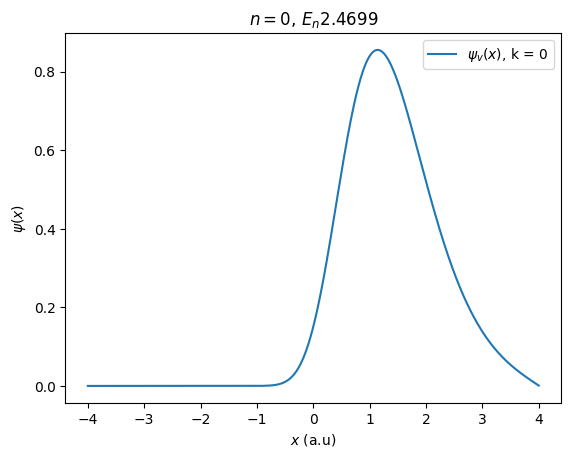

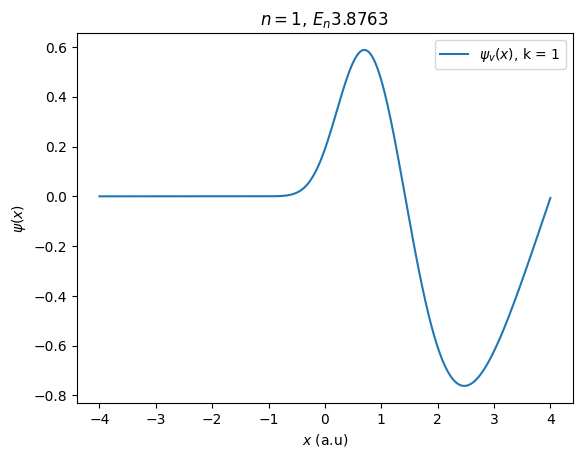

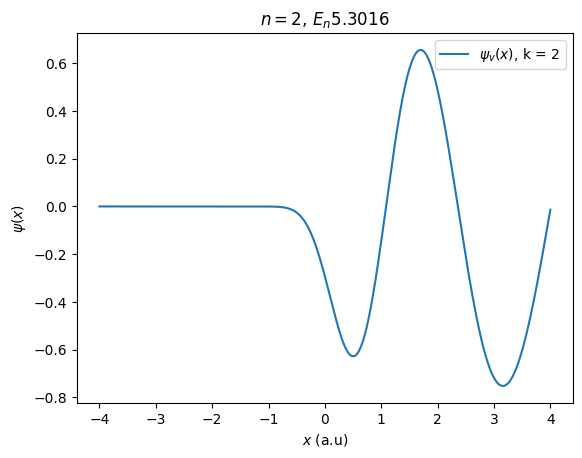

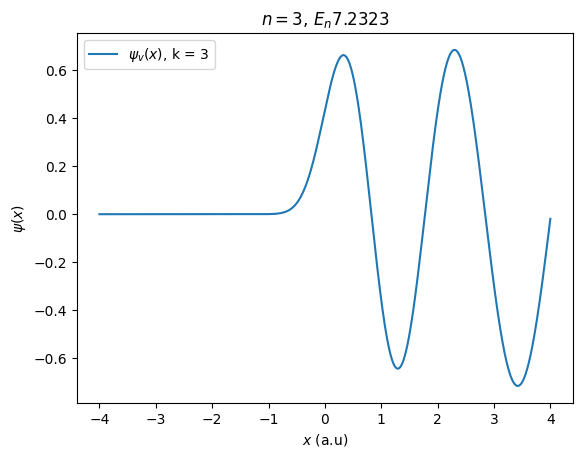

In [18]:
#Inicialitzar funció d'ona
psi = [None]*npoints

#Càlcul de funcions d'ona normalitzades
for k in range(0,len(w)):
  psi[k] = vs[:,k]
  integral = h * np.dot(psi[k], psi[k])
  psi[k] = psi[k]/ integral**0.5

#Graficar les funcions d'ona
print('Graficant')
for v in range(0,4):
  plt.plot(x,psi[v],label=r'$\psi_v(x)$, k = ' + str(v))
  plt.title(r'$n=$'+ str(v)+r', $E_n$'+'{:.4f}'.format(E[v]))
  plt.legend()
  plt.xlabel(r'$x$ (a.u)')
  plt.ylabel(r'$\psi(x)$')
  plt.show()